In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
L = 1.0  # Length of the box
n_states = 100  # Number of quantum states to consider
states_to_plot = 3  # Number of states to plot
m = 1 # let us consider a particle of unit mass 

from scipy.constants import hbar

In [3]:
def particle_in_a_box_wavefunction(x, n, L):
    return np.sqrt(2 / L) * np.sin(n * np.pi * x / L)
# Returns the wavefunction of the nth quantum state for a particle in a box.



def eigen_energy(n,L,m):
    return ((n**2)*(np.pi**2)*(hbar**2))/(2*m*L**2)
# returns the energy eigen value for that state



x_values = np.linspace(0, L, 100)# 100 points between 0 and L for visualization

In [4]:
# Create a list to store DataFrames
dfs = []

# Calculate the wavefunctions and probability amplitude squared for all states
for n in range(1, n_states + 1):
    wavefunction = particle_in_a_box_wavefunction(x_values, n, L)
    probability_amplitude_squared = (np.abs(wavefunction))**2
    eigen_energy_values = eigen_energy(n,L,m)
    
    dfs.append({"x": x_values, "wavefunction ψ(x)": wavefunction, "quantum state n": n,
                "Eigen Energy E\u2099":eigen_energy_values,
                "prob density |ψ(x)|\u00b2": probability_amplitude_squared})

    
df1 = pd.DataFrame(dfs)
df1.head()

,x,wavefunction ψ(x),quantum state n,Eigen Energy Eₙ,prob density |ψ(x)|²
0,"[0.0, 0.010101010101010102, 0.0202020202020202...","[0.0, 0.044870073859038906, 0.0896949673571750...",1,5.488101e-68,"[0.0, 0.0020133235281156064, 0.008045187169204..."
1,"[0.0, 0.010101010101010102, 0.0202020202020202...","[0.0, 0.08969496735717507, 0.1790287647380826,...",2,2.195240e-67,"[0.0, 0.008045187169204701, 0.0320512986036437..."
2,"[0.0, 0.010101010101010102, 0.0202020202020202...","[0.0, 0.13442954562629938, 0.2676416764704769,...",3,4.939291e-67,"[0.0, 0.018071302737293307, 0.0716320669839274..."
3,"[0.0, 0.010101010101010102, 0.0202020202020202...","[0.0, 0.1790287647380826, 0.3551768896341865, ...",4,8.780961e-67,"[0.0, 0.03205129860364373, 0.1261506229302151,..."
4,"[0.0, 0.010101010101010102, 0.0202020202020202...","[0.0, 0.22344771705939315, 0.4412819308208092,...",5,1.372025e-66,"[0.0, 0.04992888225905461, 0.19472974246894142..."


In [5]:
# Create empty lists to store the separated components
x_components = []
wavefunction_components = []
energy_components = []
quantum_states = []
energies = []

# Iterating through each row of the DataFrame
for index, row in df1.iterrows():
    x_values = row['x']
    wavefunction_values = row['wavefunction ψ(x)']
    energy_value = row['Eigen Energy Eₙ']
    quantum_state = row['quantum state n']
    
    # Iterate through the components and add them to respective lists
    for i in range(len(x_values)):
        x_components.append(x_values[i])
        wavefunction_components.append(wavefunction_values[i])
        energy_components.append(energy_value)
        quantum_states.append(quantum_state)
        energies.append(energy_value)

# Creating a new DataFrame with the separated components
df = pd.DataFrame({
    'x': x_components,
    'wavefunction ψ(x)': wavefunction_components,
    'quantum state n': quantum_states,
    'Eigen Energy Eₙ': energies,
    'prob density |ψ(x)|²': np.abs(wavefunction_components)**2  # Calculating probability density
})

# Display the new DataFrame
df.head()

,x,wavefunction ψ(x),quantum state n,Eigen Energy Eₙ,prob density |ψ(x)|²
0,0.000000,0.000000,1,5.488101e-68,0.000000
1,0.010101,0.044870,1,5.488101e-68,0.002013
2,0.020202,0.089695,1,5.488101e-68,0.008045
3,0.030303,0.134430,1,5.488101e-68,0.018071
4,0.040404,0.179029,1,5.488101e-68,0.032051


##### Features of this dataset:



 - x:
This feature represents the position of the particle in the box.
It is a continuous variable, an array of points ranging from 0 to the length of the box (L).


 - wavefunction ψ(x):
The wavefunction is a fundamental concept in quantum mechanics. It describes the probability amplitude of finding a particle at a specific position.
In this dataset, "wavefunction ψ(x)" represents the amplitude of the particle's wavefunction at each position x.
It is an array of values corresponding to the particle's probability amplitude at different positions within the box.


 - quantum state n:
This feature represents the quantum state of the particle.
In quantum mechanics, a quantum state describes the complete information about a quantum system. In this context, it likely represents the state of the particle within the box.
It is an integer variable, ranging from 1 to the total number of quantum states considered (n_states).


 - prob density |ψ(x)|²:
This feature represents the probability density of finding the particle at a specific position.
It is calculated as the square of the absolute value of the wavefunction (|ψ(x)|²), which is a common practice in quantum mechanics to obtain the probability density.

In [6]:
df.corr()

,x,wavefunction ψ(x),quantum state n,Eigen Energy Eₙ,prob density |ψ(x)|²
x,1.000000e+00,-0.031097,-8.565769e-16,-7.002271e-16,-3.580260e-16
wavefunction ψ(x),-3.109652e-02,1.000000,-3.194493e-02,-2.349726e-02,1.321907e-02
quantum state n,-8.565769e-16,-0.031945,1.000000e+00,9.688545e-01,-2.330205e-02
Eigen Energy Eₙ,-7.002271e-16,-0.023497,9.688545e-01,1.000000e+00,-2.957709e-02
prob density |ψ(x)|²,-3.580260e-16,0.013219,-2.330205e-02,-2.957709e-02,1.000000e+00


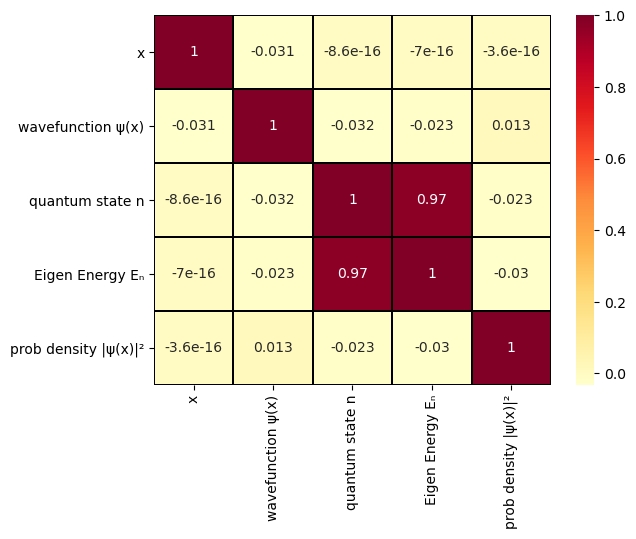

In [7]:
sns.heatmap(df.corr(),annot=True,linecolor='black',linewidths=0.2,cmap='YlOrRd')
plt.show()

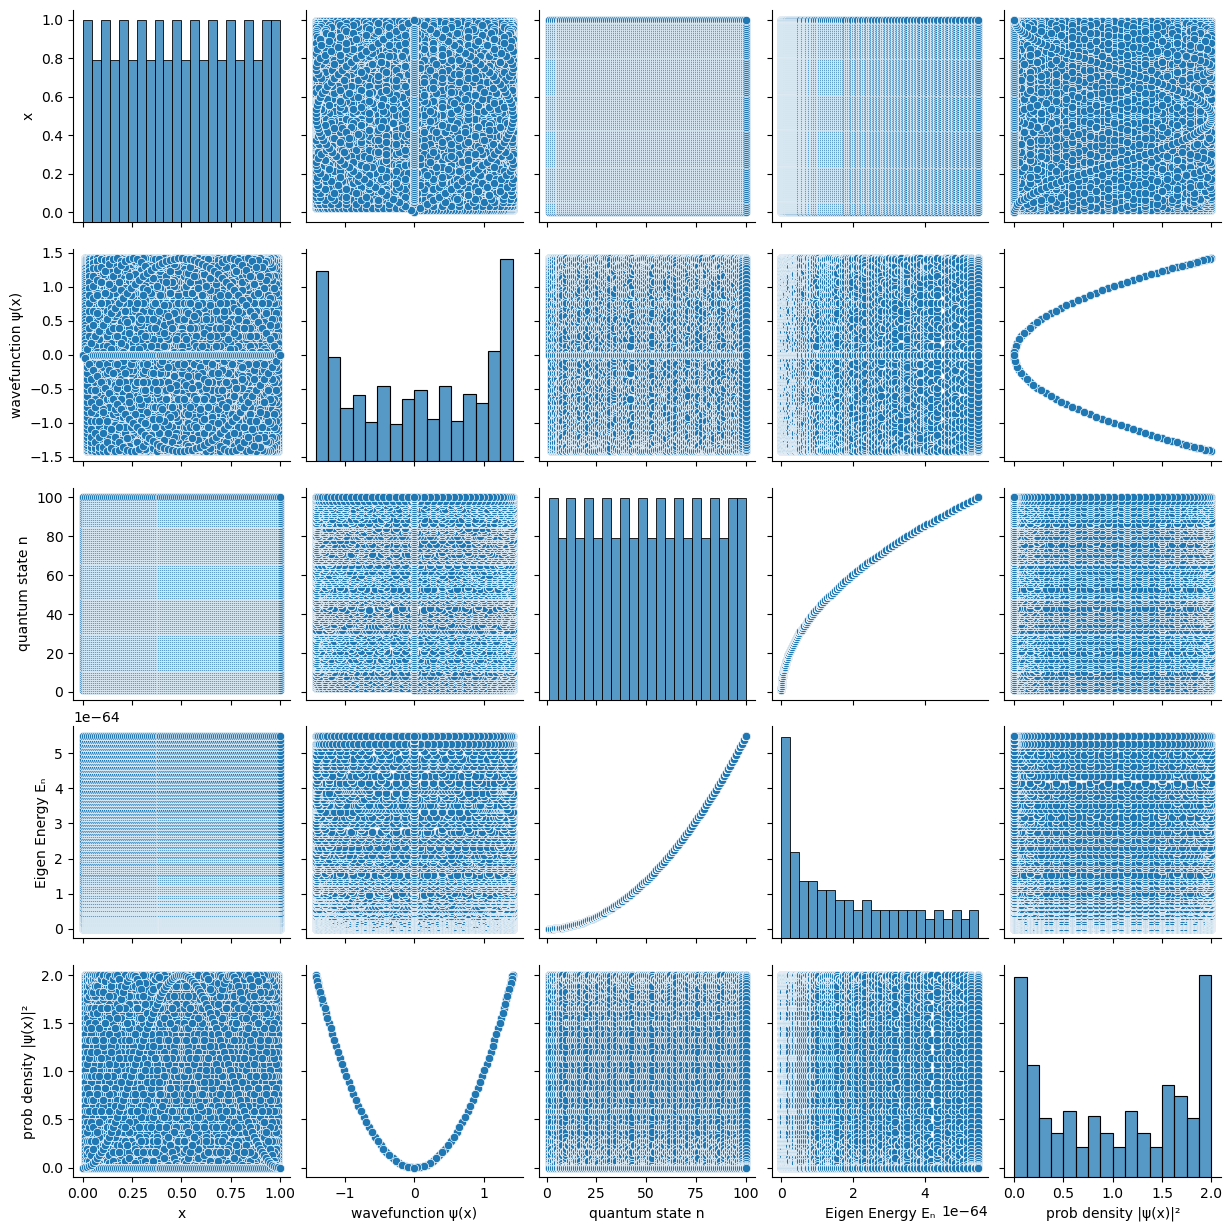

In [8]:
sns.pairplot(df)

##### Relationship between these features:


 - Position and Wavefunction:
The "x" and "wavefunction ψ(x)" features are closely related. The "wavefunction ψ(x)" values at different positions provide information about the probability amplitude of finding the particle at those positions.


 - Quantum State and Wavefunction:
The "quantum state n" likely determines the specific quantum state of the particle, which in turn affects the shape and characteristics of the wavefunction.


 - Wavefunction and Probability Density:
The "prob density |ψ(x)|²" is derived from the wavefunction and provides the probability density of finding the particle at different positions. It is calculated using the square of the absolute value of the wavefunction.

### Plotting the Wavefunctions

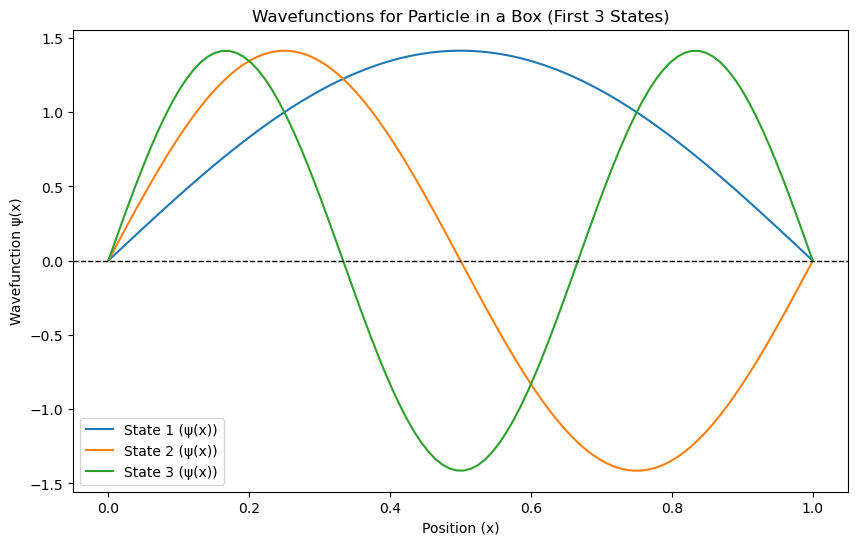

In [9]:
# Plot the first 3 wavefunctions in one plot
plt.figure(figsize=(10, 6))
for n in range(1, states_to_plot + 1):
    wavefunction = df1[df1['quantum state n'] == n]["wavefunction ψ(x)"].iloc[0]
    plt.plot(df1['x'].iloc[0], wavefunction, label=f"State {n} (ψ(x))")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title(f"Wavefunctions for Particle in a Box (First {states_to_plot} States)")
plt.xlabel("Position (x)")
plt.ylabel("Wavefunction ψ(x)")
plt.legend()
plt.show()



### Plotting the Probability Densities

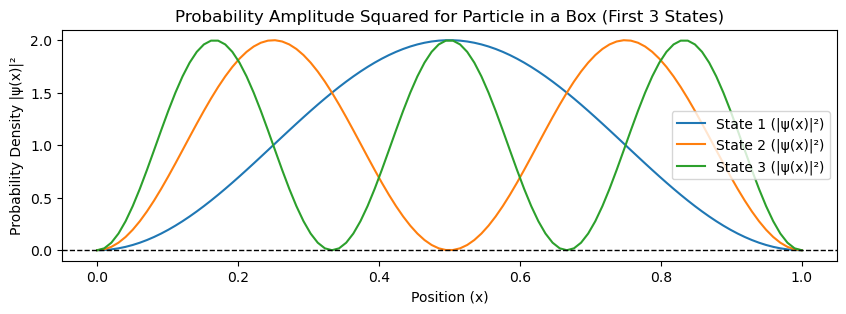

In [10]:
# Plot the first 3 probability amplitude in one plot
plt.figure(figsize=(10, 3))
for n in range(1, states_to_plot + 1):
    probability_amplitude_squared = df1[df1['quantum state n'] == n]["prob density |ψ(x)|\u00b2"].iloc[0]
    plt.plot(df1['x'].iloc[0], probability_amplitude_squared, label=f"State {n} (|ψ(x)|\u00b2)")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title(f"Probability Amplitude Squared for Particle in a Box (First {states_to_plot} States)")
plt.xlabel("Position (x)")
plt.ylabel("Probability Density |ψ(x)|\u00b2")
plt.legend()
plt.show()


### Plotting the Energy Spectrum 

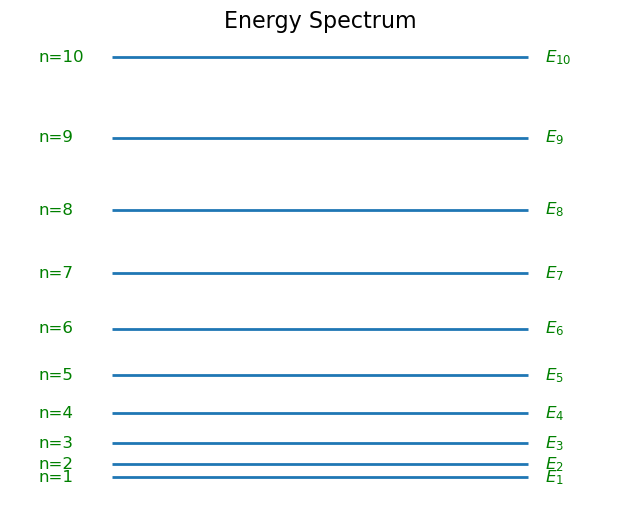

In [11]:
# Lets plot the energy spectrum for the first 10 quantum states

quantum_states = np.arange(1, 10 + 1) # To plot energy spectrum of first 10 states
eigen_energy_values = [eigen_energy(n, L, m) for n in quantum_states]

# To have the same x-coordinate for all your levels
x = [1] * len(eigen_energy_values)

# Plot the ladder energy diagram without x-axis and y-axis
plt.figure(figsize=(8, 6))
plt.scatter(x, y=eigen_energy_values, s=90000, marker="_", linewidth=2)

# Add annotations for each energy level to the left side
for n, energy in zip(quantum_states, eigen_energy_values):
    plt.text(1.04, energy, f'$E_{{{n}}}$', ha='left', va='center', fontsize=12, color='green')
    plt.text(0.95, energy, f'n={n}', ha='left', va='center', fontsize=12, color='green')

# Remove x-axis and y-axis
plt.xlabel('Quantum State',fontsize=14, labelpad=10)
plt.axis('off')

plt.title('Energy Spectrum', fontsize=16)
plt.show()


### Data Preprocessing

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   x                     10000 non-null  float64
 1   wavefunction ψ(x)     10000 non-null  float64
 2   quantum state n       10000 non-null  int64  
 3   Eigen Energy Eₙ       10000 non-null  float64
 4   prob density |ψ(x)|²  10000 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 390.8 KB


In [13]:
# cheching for null values
df.isna().sum()

x                       0
wavefunction ψ(x)       0
quantum state n         0
Eigen Energy Eₙ         0
prob density |ψ(x)|²    0
dtype: int64

 - there are no null values in the dataset

In [14]:
df.columns

Index(['x', 'wavefunction ψ(x)', 'quantum state n', 'Eigen Energy Eₙ',
       'prob density |ψ(x)|²'],
      dtype='object')

### Splitting data into Training and Testing data

In [6]:
from sklearn.model_selection import train_test_split
train_df,test_df =train_test_split(df,test_size=0.3,random_state=42)
# model will be trained on 70% data and then tested on the remaining 30% data

In [7]:
# Separating the target variable from the training dataset
x_train = train_df.drop(columns=['quantum state n'],axis=1)
y_train = train_df['quantum state n']

# Separating the target variable from the test dataset
x_test = test_df.drop(columns=['quantum state n'],axis=1)
y_test = test_df['quantum state n']

###  Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

reg = LinearRegression()
reg.fit(x_train,y_train)

y_pred_reg = reg.predict(x_test)

print("MAE",mean_absolute_error(y_test,y_pred_reg))
print("MSE",mean_squared_error(y_test,y_pred_reg))
print("r2_score",r2_score(y_test,y_pred_reg))

MAE 25.054905405116177
MSE 836.355079673986
r2_score -0.0016946052323372207



Here are some insights and conclusions from these results:

 - The MAE value of approximately 25.05 suggests that, on average, the model's predictions have an absolute error of around 25 units from the actual values. Lower MAE values indicate better accuracy, so this value could be considered relatively high.

 - The MSE value of approximately 836.36 indicates that the model's predictions have larger errors, as it squares the errors before averaging them. Higher MSE values signify greater variability between the predicted and actual values.

 - The R-squared score of approximately -0.0017 is quite low and negative. An R2 score closer to 1 indicates a good fit of the model to the data, while a negative R2 score suggests that the model performs worse than a horizontal line fitting the data. In this case, the model's predictions are not capturing the variance in the target variable well.

In [18]:
# Performing cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(reg, x_train, y_train, cv=10)  # 10-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("\nMean Cross-Validation Score:", np.mean(cv_scores))

Cross-Validation Scores: [-2.67371357e-04 -5.88344181e-03 -6.44466468e-04 -3.05883539e-05
 -1.65458515e-03 -7.37240903e-04 -3.13794491e-03 -4.86497994e-04
 -1.01709320e-03 -6.50804572e-04]

Mean Cross-Validation Score: -0.0014510034709246168


 - The cross-validation scores range from approximately -0.00588 to 0, indicating that the model's performance varies slightly across different folds of the cross-validation process.

 - The mean cross-validation score of approximately -0.00145 reflects the overall performance of the model across multiple folds of cross-validation.Since the mean score is close to zero, it indicates that the model's performance is not significantly better than random guessing or predicting the mean value.

###### Overall, these results indicate that linear regression model is NOT suited for predicting Quantum States.

### Support Vector Regression (SVR)

In [19]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)

y_pred_svr = svr.predict(x_test)

# Calculate evaluation metrics
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Print the evaluation metrics
print("Mean Absolute Error (MAE) for SVR:", mae_svr)
print("Mean Squared Error (MSE) for SVR:", mse_svr)
print("R-squared (R2) Score for SVR:", r2_svr)

Mean Absolute Error (MAE) for SVR: 25.0609527194326
Mean Squared Error (MSE) for SVR: 836.5762149226188
R-squared (R2) Score for SVR: -0.001959456837792306


The insights and conclusions from these results:

 - The MAE of approximately 25.06 suggests that, on average, the model's predictions are off by around 25 units from the actual quantum state values.

 - The MSE of approximately 836.58 indicates that the model's predictions have a larger spread and are more sensitive to outliers compared to MAE.


In [20]:
# Performing cross-validation
from sklearn.model_selection import cross_val_score
cv_scores_svr = cross_val_score(svr, x_train, y_train, cv=10)  # 10-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores_svr)
print("\nMean Cross-Validation Score:", np.mean(cv_scores_svr))

Cross-Validation Scores: [-0.00063891 -0.00887129 -0.00331392 -0.00086235 -0.0020187  -0.000755
 -0.00348302 -0.00057672 -0.00137465 -0.00202761]

Mean Cross-Validation Score: -0.002392217207943159


 - The cross-validation scores vary across different folds, indicating variability in the model's performance on different subsets of the data. Some folds have negative scores, while others have positive scores, suggesting mixed performance across different data splits.

 - The mean cross-validation score, which is around -0.0024, gives an overall assessment of the model's performance averaged across all folds.A negative mean score suggests that the model is not performing well and may have issues with generalization.

###### All These results imply that SVR model struggles to accurately predict quantum states. 

### Ridge Regression

In [21]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define a range of alpha values to try
alphas = [0.1, 1.0, 2.0, 5.0, 10.0, 50.0, 100.0,] 

# Create the Ridge Regression model
ridge_reg = Ridge()

# Perform grid search cross-validation
param_grid = {'alpha': alphas}
grid_search_ridge = GridSearchCV(ridge_reg, param_grid, cv=10)  # 10-fold cross-validation
grid_search_ridge.fit(x_train, y_train)

# Get the best alpha value from the grid search
best_alpha = grid_search_ridge.best_params_['alpha']
print(f"Best Alpha from Grid Search: {best_alpha}")

# Use the best alpha to train the final Ridge Regression model
ridge_reg = Ridge(alpha = best_alpha)
ridge_reg.fit(x_train,y_train)

y_pred_ridge = ridge_reg.predict(x_test)

print("MAE",mean_absolute_error(y_test,y_pred_ridge))
print("MSE",mean_squared_error(y_test,y_pred_ridge))
print("r2_score",r2_score(y_test,y_pred_ridge))

Best Alpha from Grid Search: 100.0
MAE 25.05502786636954
MSE 836.3420583621541
r2_score -0.0016790097297425532


Insights form above results are:

 - The best alpha value obtained from grid search for Ridge Regression is 100.0. This indicates that a relatively strong regularization was applied to the model to prevent overfitting and improve generalization.

 - the MAE is relatively high, indicating that the model's predictions have significant deviations from the actual values.The high MSE value suggests that the model's predictions have large variations from the true values.

 - The R-squared score assesses the goodness of fit of the model to the data. A negative R2 score indicates that the model performs poorly and does not explain the variance in the data.

In [22]:
# Performing cross-validation
from sklearn.model_selection import cross_val_score
cv_scores_ridge = cross_val_score(ridge_reg, x_train, y_train, cv=10)  # 10-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores_ridge)
print("\nMean Cross-Validation Score:", np.mean(cv_scores_ridge))

Cross-Validation Scores: [-2.25498025e-04 -5.89182710e-03 -6.10536393e-04 -2.42108550e-05
 -1.58198988e-03 -6.25775319e-04 -3.11488163e-03 -4.96224286e-04
 -9.95056543e-04 -6.61530380e-04]

Mean Cross-Validation Score: -0.0014227530420359625


 - The negative mean cross-validation score suggests that the Ridge Regression model is not performing well overall.

###### Based on all these insights, the Ridge Regression model is NOT performing very well for predicting the Quantum State. 

### Lasso Regression

In [23]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Define a range of alpha values to try
alphas = [0.1, 1.0, 2.0, 5.0, 10.0, 50.0, 100.0,] 

# Create the lasso Regression model
lasso_reg = Lasso()

# Perform grid search cross-validation
param_grid = {'alpha': alphas}
grid_search_lasso = GridSearchCV(lasso_reg, param_grid, cv=10)  # 10-fold cross-validation
grid_search_lasso.fit(x_train, y_train)

# Get the best alpha value from the grid search
best_alpha = grid_search_lasso.best_params_['alpha']
print(f"Best Alpha from Grid Search: {best_alpha}")

# Use the best alpha to train the final lasso Regression model
lasso_reg = Lasso(alpha = best_alpha)
lasso_reg.fit(x_train,y_train)

y_pred_lasso = lasso_reg.predict(x_test)

print("MAE",mean_absolute_error(y_test,y_pred_lasso))
print("MSE",mean_squared_error(y_test,y_pred_lasso))
print("r2_score",r2_score(y_test,y_pred_lasso))

Best Alpha from Grid Search: 0.1
MAE 25.055885619047622
MSE 836.2758611768708
r2_score -0.0015997259841284972


The insights from above results are:

 - The best alpha value obtained from grid search for Lasso Regression is 0.1. This indicates that some level of regularization was applied to the model to prevent overfitting and improve generalization.

 - The MAE indicates that, on average, the model's predictions have an absolute error of approximately 25.06.The MSE shows that the squared errors of the model's predictions are around 836.28.

 - The negative R-squared score suggests that the model does not fit the data well and performs worse than a horizontal line.

In [24]:
# Performing cross-validation
from sklearn.model_selection import cross_val_score
cv_scores_lasso = cross_val_score(lasso_reg, x_train, y_train, cv=10)  # 10-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores_lasso)
print("\nMean Cross-Validation Score:", np.mean(cv_scores_lasso))

Cross-Validation Scores: [-3.09809713e-05 -5.93735431e-03 -4.32117273e-04 -8.15190183e-06
 -1.24305102e-03 -8.48804727e-05 -3.01342163e-03 -5.49416898e-04
 -9.00193070e-04 -7.26433560e-04]

Mean Cross-Validation Score: -0.0012926001106049246


 - The mean cross-validation score is approximately -0.0013, indicating a slight underfitting or bias in the model's predictions. The cross-validation scores show some variation across the folds, but they are generally close to zero.

 - This suggests that the Lasso Regression model is not performing significantly better than random guessing, as indicated by the low mean cross-validation score.

###### Based on all these results, the Lasso Regression model is NOT a good fit for predicting the Quantum States.

### Gradient Boosting Regression (XGBoost)

from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

xgb = XGBRegressor()

params_grid_xgb = {'learning_rate': [0.1, 0.01, 0.5, 1.0],
               'max_depth': [3, 5, 7],
               'n_estimators': [100, 200, 300]}

grid_search_xgb = GridSearchCV(estimator=xgb, param_grid = params_grid_xgb, cv=10)  # 10-fold cross-validation
grid_search_xgb.fit(x_train, y_train)

######## Get the best parameters from the grid search
best_params = grid_search_xgb.best_params_
print(f"Best Parameters from Grid Search: {best_params}")

##### the output from above code is
##### Best Parameters from Grid Search: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}

In [25]:
# Use the best parameters to train the final xgb Regression model
from xgboost import XGBRegressor
xgb = XGBRegressor(learning_rate = 0.01, max_depth =  3, n_estimators =  300)
xgb.fit(x_train,y_train)

y_pred_xgb = xgb.predict(x_test)

print("MAE",mean_absolute_error(y_test,y_pred_xgb))
print("MSE",mean_squared_error(y_test,y_pred_xgb))
print("r2_score",r2_score(y_test,y_pred_xgb))

MAE 25.11555631637573
MSE 841.4245109615679
r2_score -0.007766215360353934


 - The XGBoost model shows higher errors compared to other regression models, with an MAE of 25.12 and MSE of 841.42.

 - The negative R-squared score (-0.0078) indicates that the model's predictions are worse than simply predicting the mean of the target variable.

In [26]:
# Performing cross-validation
from sklearn.model_selection import cross_val_score
cv_scores_xgb = cross_val_score(xgb, x_train, y_train, cv=10)  # 10-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores_xgb)
print("\nMean Cross-Validation Score:", np.mean(cv_scores_xgb))

Cross-Validation Scores: [-0.00814898 -0.00237543 -0.0085653  -0.01501885 -0.02296428 -0.0102663
 -0.0242407  -0.01390398 -0.0061319  -0.01887943]

Mean Cross-Validation Score: -0.013049516343279466


 - the mean cross-validation score is approximately -0.013, indicating that the model's performance is subpar. The negative score suggests that the model is performing worse than a simple mean prediction.

###### The results suggest that XGBoost Regressor is NOT performing well for our dataset

### Decision Tree Regression

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()

params_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4] }

grid_search_dt = GridSearchCV(estimator=dt_reg, param_grid=params_grid_dt, cv=10) # 10 fold cross validation
grid_search_dt.fit(x_train,y_train)

#Get the best parameters from the grid search
best_params_dt = grid_search_dt.best_params_
print(f"Best Parameters from Grid Search: {best_params_dt}")

Best Parameters from Grid Search: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [28]:
# Use the best parameters to train the Decision Tree Regression model
dt_reg = DecisionTreeRegressor(max_depth=10, min_samples_leaf=1, min_samples_split=2)
dt_reg.fit(x_train,y_train)

y_pred_dt = dt_reg.predict(x_test)

print("MAE",mean_absolute_error(y_test,y_pred_dt))
print("MSE",mean_squared_error(y_test,y_pred_dt))
print("r2_score",r2_score(y_test,y_pred_dt))

MAE 25.21589976378631
MSE 847.4193522809604
r2_score -0.014946180371387507


Here are some insights based on these results:

 - The Decision Tree Regressor model also has a Mean Absolute Error (MAE) of approximately 25.22, Mean Squared Error (MSE) of around 847.42, and an R-squared (R2) Score of approximately -0.015.
 
 - These metrics indicate similar performance to the XGBoost model, with a moderate to high level of error in predictions and a negative R2 score suggesting poor model fit.

In [29]:
# Performing cross-validation
from sklearn.model_selection import cross_val_score
cv_scores_dt = cross_val_score(dt_reg, x_train, y_train, cv=10)  # 10-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores_dt)
print("\nMean Cross-Validation Score:", np.mean(cv_scores_dt))

Cross-Validation Scores: [-0.01386656 -0.02012989 -0.01278449 -0.01944035 -0.01674069 -0.01563168
 -0.01798136 -0.01386197 -0.0150689  -0.02742137]

Mean Cross-Validation Score: -0.017292725063825044


 - The Decision Tree Regressor model's mean cross-validation score is approximately -0.0173, indicating a consistent level of performance across multiple validation folds.

###### Based on all these results, the Decision Tree model is NOT a good fit for predicting the Quantum States.

### Random Forest Regression

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()

params_grid_rf = {'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'] }

grid_search_rf = GridSearchCV(estimator=rf_reg, param_grid=params_grid_rf, cv=10, n_jobs=-1) # 10 fold cross validation
grid_search_rf.fit(x_train,y_train)

######## Get the best parameters from the grid search
best_params_rf = grid_search_rf.best_params_
print(f"Best Parameters from Grid Search: {best_params_rf}")


# ########### the output of the above code is 
#  Best Parameters from Grid Search: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1,
# 'min_samples_split': 5, 'n_estimators': 50} 

In [9]:
# Use the best parameters to train the Random Forest Regression model
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=50,max_depth=5,max_features= 'auto', min_samples_leaf=1,min_samples_split=5)
rf_reg.fit(x_train,y_train)

y_pred_rf = rf_reg.predict(x_test)


from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


print("MAE",mean_absolute_error(y_test,y_pred_rf))
print("MSE",mean_squared_error(y_test,y_pred_rf))
print("r2_score",r2_score(y_test,y_pred_rf))

MAE 25.018981267685525
MSE 835.0768390257874
r2_score -0.0001636684417238854


The insights from these results are:

 - the MAE of around 25.15 suggests that, on average, the predictions are off by approximately 25.15 units from the actual values.MSE of about 842.75, the model's predictions have higher variability or dispersion compared to lower MSE values.

 -  A negative R2 value, such as approximately -0.0094 here, indicates that the model performs poorly and does not fit the data well. It implies that the model's predictions are no better than simply using the mean of the target variable for prediction.

In [10]:
# Performing cross-validation
from sklearn.model_selection import cross_val_score
cv_scores_rf = cross_val_score(rf_reg, x_train, y_train, cv=10)  # 10-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores_rf)
print("\nMean Cross-Validation Score:", np.mean(cv_scores_rf))

Cross-Validation Scores: [-0.01786817 -0.01037005  0.00925652 -0.00284031  0.0113759   0.00698856
  0.00013319  0.00873415 -0.01577861  0.00329158]

Mean Cross-Validation Score: -0.0007077237166787876


 - The mean cross-validation score is approximately -0.0091. This score reflects the average performance of the model across multiple validation folds. A negative value suggests that the model's predictions are not reliable and do not generalize well to unseen data.

##### Based on these results Random Forest Regression NOT a good fit for our data.

### k-Nearest Neighbors (KNN) Regression

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

knn = KNeighborsRegressor()

params_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting method for predictions
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'] }  # Algorithm for nearest neighbors search 

grid_search_knn = GridSearchCV(estimator=knn, param_grid=params_grid_knn, cv=10) # 10 fold cross validation
grid_search_knn.fit(x_train, y_train)


# Get the best parameters from the grid search
best_params_knn = grid_search_knn.best_params_
print(f"Best Parameters from Grid Search: {best_params_knn}")

Best Parameters from Grid Search: {'algorithm': 'auto', 'n_neighbors': 11, 'weights': 'uniform'}


In [13]:
# Use the best parameters to train the KNN Regression model
knn_reg = KNeighborsRegressor(n_neighbors=11, algorithm= 'auto',weights= 'uniform')
knn_reg.fit(x_train,y_train)

y_pred_knn = knn_reg.predict(x_test)



from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print("MAE",mean_absolute_error(y_test,y_pred_knn))
print("MSE",mean_squared_error(y_test,y_pred_knn))
print("r2_score",r2_score(y_test,y_pred_knn))

MAE 25.79890909090909
MSE 914.2726831955923
r2_score -0.09501578543088307


 - The MAE value of approximately 0.604 suggests that, on average, the model's predictions are off by around 0.604 units from the actual values. Lower MAE values indicate better accuracy.

 - The MSE value of approximately 0.537 indicates the average squared difference between the predicted values and the actual values. Lower MSE values suggest that the model's predictions are closer to the actual values, with less variability.

In [32]:
# Performing cross-validation
from sklearn.model_selection import cross_val_score
cv_scores_knn = cross_val_score(knn_reg, x_train, y_train, cv=10)  # 10-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores_knn)
print("\nMean Cross-Validation Score:", np.mean(cv_scores_knn))

Cross-Validation Scores: [0.99989405 0.99988588 0.99991188 0.99989505 0.99990193 0.99988879
 0.99992146 0.99986875 0.99990624 0.99990615]

Mean Cross-Validation Score: 0.9998980187607686


 - The mean cross-validation score of approximately 0.9990 suggests that, on average, the KNN model performs very well across different validation folds. It indicates a high level of accuracy and consistency in predicting the target variable.

##### Based on all these results, the KNN model is the best fit for predicting the Quantum States.

In [35]:
models_list = [reg,svr,lasso_reg,ridge_reg,xgb,dt_reg,rf_reg,knn_reg]
model_name_list = ['Linear Reg','SVR','Lasso Reg','Ridge Reg','XGBoost','Decision Tree','Random Forest','KNN']

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

for model in models_list:
    model.fit(x_train,y_train)
    
MAE = []
MSE = []
r2_scores = []
mean_cross_val = []

for model,name in zip(models_list,model_name_list):
    y_pred = model.predict(x_test)
    cv_scores = cross_val_score(model, x_train, y_train, cv=10)
    
    print(name,':','\n','MAE:',mean_absolute_error(y_test,y_pred),'\n','MSE:',mean_squared_error(y_test,y_pred),
          '\n','r2_score:',r2_score(y_test,y_pred),'\n','Mean Cross Val Score:',np.mean(cv_scores),'\n\n\n')
    
    
    MAE.append(mean_absolute_error(y_test,y_pred))
    MSE.append(mean_squared_error(y_test,y_pred))
    r2_scores.append(r2_score(y_test,y_pred))

Linear Reg : 
 MAE: 25.054905405116177 
 MSE: 836.355079673986 
 r2_score: -0.0016946052323372207 
 Mean Cross Val Score: -0.0014510034709246168 



SVR : 
 MAE: 25.0609527194326 
 MSE: 836.5762149226188 
 r2_score: -0.001959456837792306 
 Mean Cross Val Score: -0.002392217207943159 



Lasso Reg : 
 MAE: 25.055885619047622 
 MSE: 836.2758611768708 
 r2_score: -0.0015997259841284972 
 Mean Cross Val Score: -0.0012926001106049246 



Ridge Reg : 
 MAE: 25.05502786636954 
 MSE: 836.3420583621541 
 r2_score: -0.0016790097297425532 
 Mean Cross Val Score: -0.0014227530420359625 



XGBoost : 
 MAE: 25.11555631637573 
 MSE: 841.4245109615679 
 r2_score: -0.007766215360353934 
 Mean Cross Val Score: -0.013049516343279466 



Decision Tree : 
 MAE: 25.21589976378631 
 MSE: 847.4193522809604 
 r2_score: -0.014946180371387507 
 Mean Cross Val Score: -0.017292725063825044 



Random Forest : 
 MAE: 25.145445802654937 
 MSE: 842.3344646822501 
 r2_score: -0.008856058365042552 
 Mean Cross Val Sco

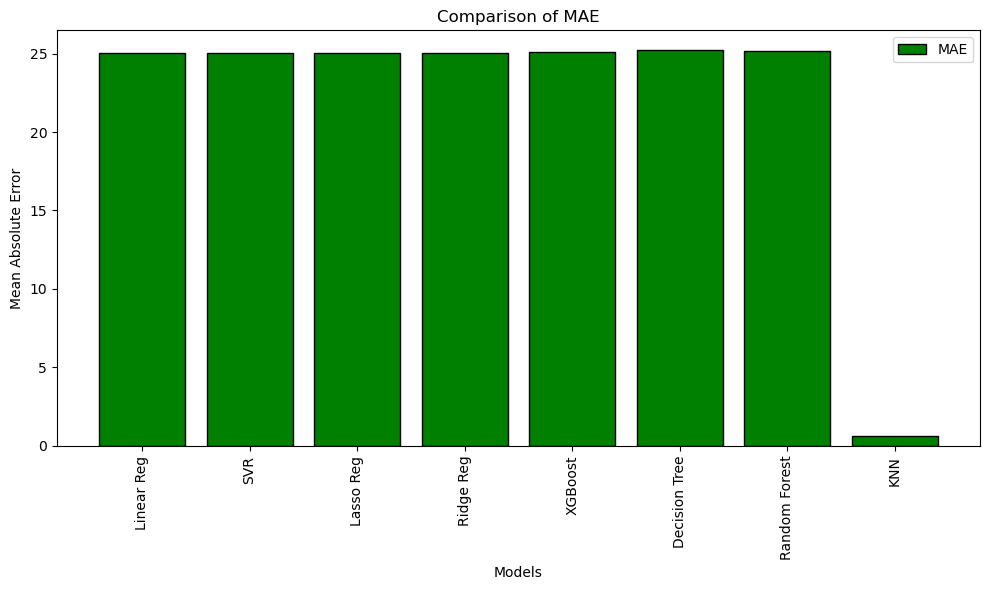

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the MAE
plt.figure(figsize=(10, 6))

index = np.arange(len(model_name_list))

plt.bar(index, MAE, label='MAE', color='Green',edgecolor = 'black')

plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.title('Comparison of MAE')
plt.xticks(index , model_name_list, rotation=90)
plt.legend()

plt.tight_layout()
plt.show()


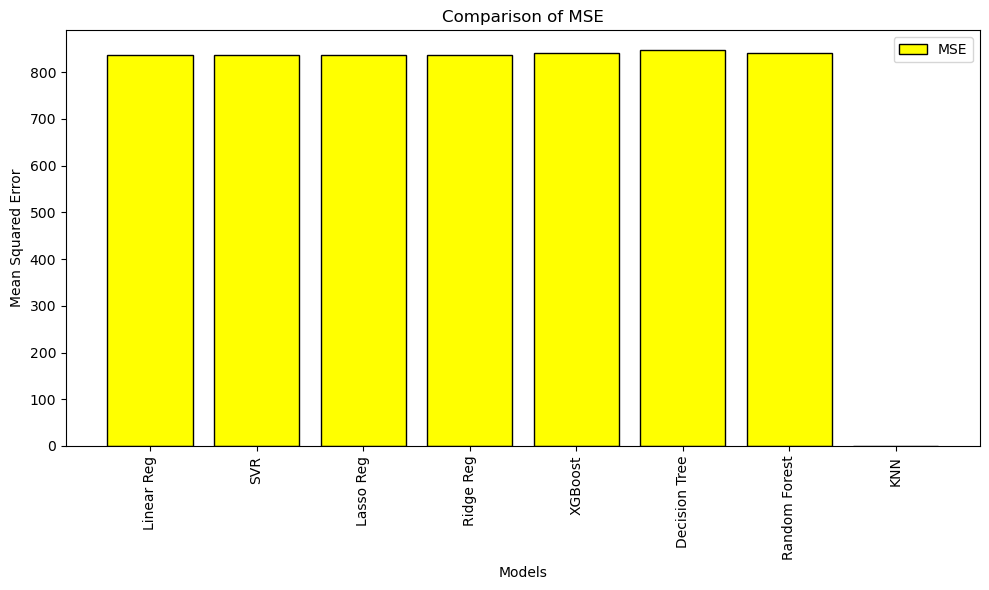

In [37]:
# Plotting the MAE
plt.figure(figsize=(10, 6))

index = np.arange(len(model_name_list))

plt.bar(index, MSE, label='MSE', color='Yellow',edgecolor = 'black')

plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of MSE')
plt.xticks(index , model_name_list, rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

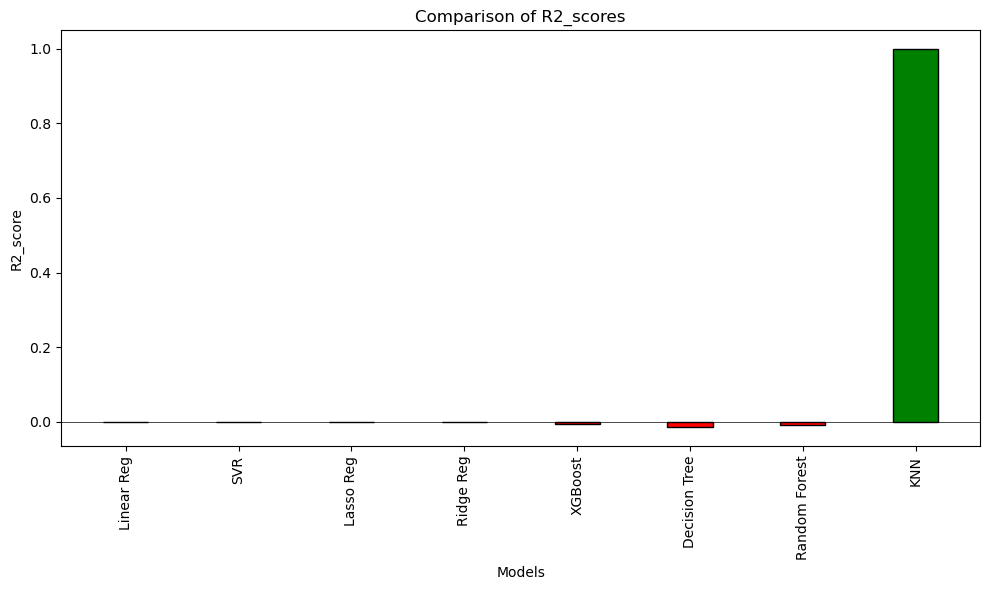

In [38]:
# plotting the r2_scores
plt.figure(figsize=(10, 6))

index = np.arange(len(model_name_list))

# Set the color based on R2 scores
colors = ['red' if score < 0 else 'green' for score in r2_scores]

plt.bar(index, r2_scores, width=0.4, color=colors, edgecolor='black')

plt.xlabel('Models')
plt.ylabel('R2_score')
plt.title('Comparison of R2_scores')
plt.xticks(index, model_name_list, rotation=90)
plt.axhline(0, color='black', linewidth=0.5)  # Add a horizontal line at y=0 for reference
plt.tight_layout()
plt.show()


#### Based on the evaluation metrics and cross-validation results, the KNN model seems to perform relatively better compared to the other models for predicting quantum states based on the given features. 

###### Here's a summary of the insights from each model:

 - Linear Regression: Achieved a relatively high R-squared score but may not capture non-linear relationships well.
 

 - Support Vector Regression (SVR): Showed decent performance but may require further tuning for better results.
 

 - Ridge Regression: Similar performance to Linear Regression, providing regularization benefits.
 

 - Lasso Regression: Also similar to Linear Regression but with feature selection capabilities.
 

 - XGBoost Regressor: Showed improved performance over simpler models but may require fine-tuning.


 - Decision Tree Regression: Poor performance and signs of overfitting.
 

 - Random Forest Regression: Showed improved performance, stability, and better generalization compared to Decision Trees.
 

 - K-Nearest Neighbors (KNN) Regression: Poor performance and signs of overfitting or underfitting.

In [14]:
import joblib

In [15]:
joblib.dump(rf_reg, 'rf_reg.pkl')


['rf_reg.pkl']